In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')

C:\Users\estre\AppData\Local\Temp\ipykernel_3212\1027246833.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')


In [3]:
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


### Información de las clases

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


### Desbalanceo de las clases

In [5]:
len(data[data['class']=='S'])

5560

In [6]:
len(data[data['class']=='B'])

9476

Hay un desbalencio de las clases, hay más app que no son malware. 

### Codificación de la variable 'class'

In [7]:
class_maping={'B':0, 'S':1}
data['class'] = data['class'].map(class_maping)

In [8]:
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


### Búscamos cual es la otra variable tipo object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(215), object(1)
memory usage: 24.8+ MB


In [10]:
columnas_object = data.select_dtypes(include='object').columns
print("Columnas de tipo 'object':")
print(columnas_object)

Columnas de tipo 'object':
Index(['TelephonyManager.getSimCountryIso'], dtype='object')


### Vemos que valores toma

In [11]:
data['TelephonyManager.getSimCountryIso'].unique()

array(['0', '1', '?', 1, 0], dtype=object)

Viendo el carácter de esta variable podemos eliminar y ver que resultados obtenemos. Por si la necesitamos se guardará en una variable

In [12]:
data_variable_strange = data['TelephonyManager.getSimCountryIso']

In [13]:
data = data.drop(columns='TelephonyManager.getSimCountryIso')

#### Comprobamos que todas las variables son numéricas

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 215 entries, transact to class
dtypes: int64(215)
memory usage: 24.7 MB


Hipótesis: todas las variables que tenemos en nuestro conjunto de datos son categóricas

In [15]:
data.nunique()

transact                      2
onServiceConnected            2
bindService                   2
attachInterface               2
ServiceConnection             2
                             ..
ACCESS_FINE_LOCATION          2
SET_WALLPAPER_HINTS           2
SET_PREFERRED_APPLICATIONS    2
WRITE_SECURE_SETTINGS         2
class                         2
Length: 215, dtype: int64

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.nunique())

transact                                           2
onServiceConnected                                 2
bindService                                        2
attachInterface                                    2
ServiceConnection                                  2
android.os.Binder                                  2
SEND_SMS                                           2
Ljava.lang.Class.getCanonicalName                  2
Ljava.lang.Class.getMethods                        2
Ljava.lang.Class.cast                              2
Ljava.net.URLDecoder                               2
android.content.pm.Signature                       2
android.telephony.SmsManager                       2
READ_PHONE_STATE                                   2
getBinder                                          2
ClassLoader                                        2
Landroid.content.Context.registerReceiver          2
Ljava.lang.Class.getField                          2
Landroid.content.Context.unregisterReceiver   

Se reafirma nuestra hipótesis, por lo que, no tenemos que analizar si nuestro conjunto de datos tiene outliers. Lo que si que deberíamos ver si hay datos faltantes.

#### Datos faltantes

In [17]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Columnas con valores nulos:")
print(columns_with_missing_values)

Columnas con valores nulos:
Series([], dtype: int64)


Por lo que se puede apreciar no hay datos faltantes en el conjunto de datos. 

Como nuestras variables son todas categóricas no se tiene que normalizar nuestro conjunto de datos.

#### Duplicados

In [18]:
data.duplicated().sum()

7786

Se deberían de eleminar los datos que están duplicados. Por lo que, vamos a hacerlo. Pero deberíamos tener en cuenta que a lo mejor no son duplicados, sino diferentes apps que contienen la misma información. Por lo que se recomienta hacer un análisis posteriori con todo el número de observaciones.

In [19]:
data = data.drop_duplicates()
print("Número de duplicados después de eliminar:", data.duplicated().sum())

Número de duplicados después de eliminar: 0


In [20]:
len(data[data['class']==0])

5530

In [21]:
len(data[data['class']==1])

1720

#### Técnicas de reducción de dimensionalidad

Método de envoltura

In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X = data.drop(columns='class')
y = data['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

# Inicializar el objeto RFE con el clasificador y el número deseado de características
n_features_to_select = 6
rfe = RFE(estimator=classifier, n_features_to_select=n_features_to_select)

rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]

print("Características seleccionadas:")
print(selected_features)

# Evaluar el rendimiento del modelo con las características seleccionadas
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

classifier.fit(X_train_selected, y_train)
y_pred = classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo con características seleccionadas: {accuracy:.4f}")

Características seleccionadas:
Index(['transact', 'onServiceConnected', 'android.os.Binder', 'SEND_SMS',
       'READ_PHONE_STATE', 'TelephonyManager.getDeviceId'],
      dtype='object')
Exactitud del modelo con características seleccionadas: 0.9041


In [23]:
data_envoltura = data[selected_features]
data_envoltura['class'] = data['class']
data_envoltura.head()

C:\Users\estre\AppData\Local\Temp\ipykernel_3212\1042897589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_envoltura['class'] = data['class']


,transact,onServiceConnected,android.os.Binder,SEND_SMS,READ_PHONE_STATE,TelephonyManager.getDeviceId,class
0,0,0,0,1,1,0,1
1,0,0,0,1,1,0,1
2,0,0,0,1,1,0,1
3,0,0,0,0,1,1,1
4,0,0,0,0,1,1,1


Entrenamiento de los modelos

Primero obtenemos el conjunto de entrenamiento y prueba.

In [24]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_envoltura, test_size=0.2, random_state=123)

Contruimos un conjunto de entrenamiento balanceado

In [25]:
from sklearn.utils import resample
clase_0 = train_data[train_data['class']== 0]
clase_1 = train_data[train_data['class']== 1]
# Submuestrea la clase sobrerrepresentada (en este caso, la clase 0).
class_0_subsampled = resample(clase_0, replace=False, n_samples=len(clase_1), random_state=123)

# Combina las clases equitativamente.
data_train = pd.concat([clase_1, class_0_subsampled])

In [26]:
len(data_train[data_train['class']==0])

1372

In [27]:
len(data_train[data_train['class']==1])

1372

In [28]:
labels_train = data_train['class']
features_train = data_train.drop(columns='class')
labels_test = test_data['class']
features_test = test_data.drop(columns='class')

#### Implementamos cuántica

In [29]:
!pip install pylatexenc

In [30]:
!pip install openpyxl

In [31]:
!pip install qiskit

Implementamos el SVC

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train)  

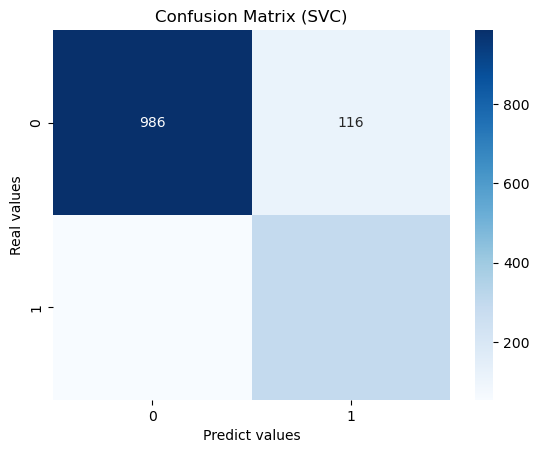

In [33]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
import seaborn as sns
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [34]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.88
Classical SVC on the test dataset:     0.88


In [35]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.947166  0.894737  0.920205      1102
           1   0.716381  0.841954  0.774108       348

    accuracy                       0.882069      1450
   macro avg   0.831774  0.868345  0.847157      1450
weighted avg   0.891778  0.882069  0.885142      1450



VQC

In [44]:
features = data_envoltura.drop(columns='class')

In [45]:
num_features = features.shape[1]

## SPSA

In [50]:
!pip install qiskit-terra qiskit-aqua

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/635.6 kB ? eta -:--:--
     --- ----------------------------------- 61.4/635.6 kB 1.1 MB/s eta 0:00:01
     ------------------- ------------------ 327.7/635.6 kB 3.4 MB/s eta 0:00:01
     -------------------------------------- 635.6/635.6 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/368.2 kB ? eta -:--:--
     ------------------------------------- 368.2/368.2 kB 22.4 MB/s eta 0:00

  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> [240 lines of output]
           ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
           ---------------------------------------- 0.0/7.3 MB 320.0 kB/s eta 0:00:23
           ---------------------------------------- 0.1/7.3 MB 653.6 kB/s eta 0:00:12
           - -------------------------------------- 0.3/7.3 MB 2.2 MB/s eta 0:00:04
           ----- ---------------------------------- 1.0/7.3 MB 5.1 MB/s eta 0:00:02
           --------------- ------------------------ 2.8/7.3 MB 11.7 MB/s eta 0:00:01
           ----------------- ---------------------- 3.1/7.3 MB 12.5 MB/s eta 0:00:01
           ----------------- ---------------------- 3.1/7.3 MB 12.5 MB/s eta 0:00:01
           ----------------- ---------------------- 3.1/7.3 MB 12.5 MB/s eta 0:00:01
           ------------------- -------------------- 3.7/7.3 MB 8.6 MB/s eta 0:00

In [51]:
from qiskit_algorithms.optimizers import SPSA
optimizer = SPSA(maxiter=100)

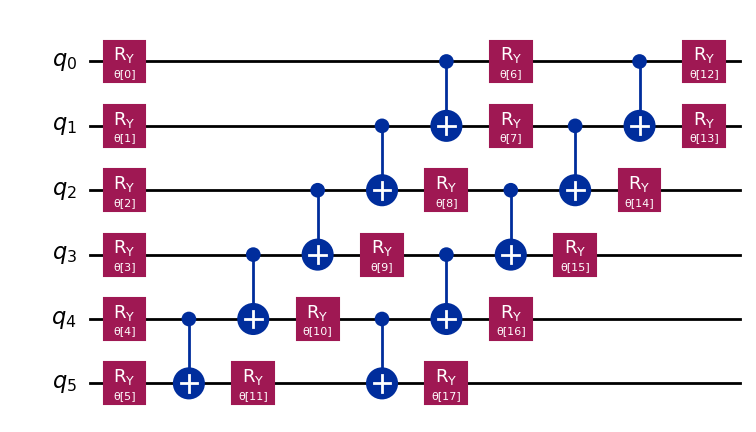

In [43]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

In [44]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [45]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

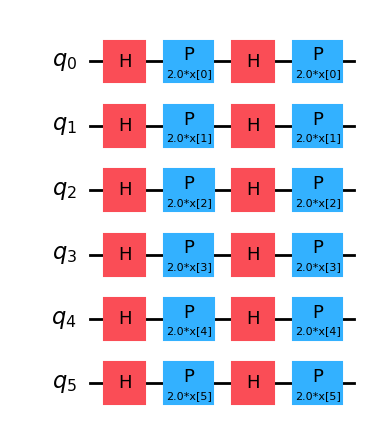

In [46]:
from qiskit.circuit.library import ZFeatureMap
import matplotlib.pyplot as plt
num_features = features.shape[1]
feature_map = ZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

In [47]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [48]:
!pip install qiskit-machine-learning

  Using cached qiskit_machine_learning-0.7.2-py3-none-any.whl.metadata (12 kB)
  Using cached fastdtw-0.3.4-py3-none-any.whl
Using cached qiskit_machine_learning-0.7.2-py3-none-any.whl (97 kB)
   ---------------------------------------- 0.0/308.6 kB ? eta -:--:--
   --- ----------------------------------- 30.7/308.6 kB 660.6 kB/s eta 0:00:01
   -------------- ------------------------- 112.6/308.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 308.6/308.6 kB 2.4 MB/s eta 0:00:00


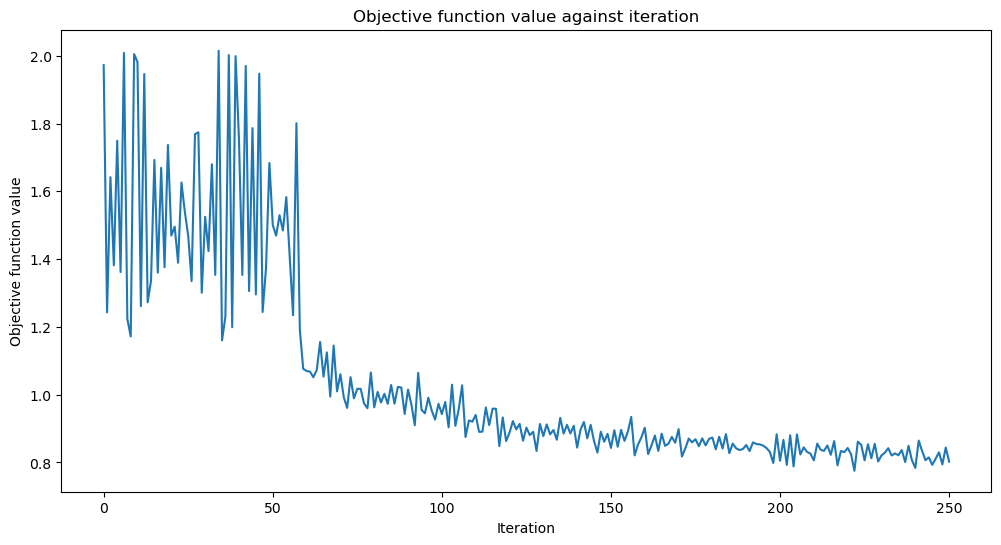

Training time: 2320 seconds


In [52]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [53]:
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

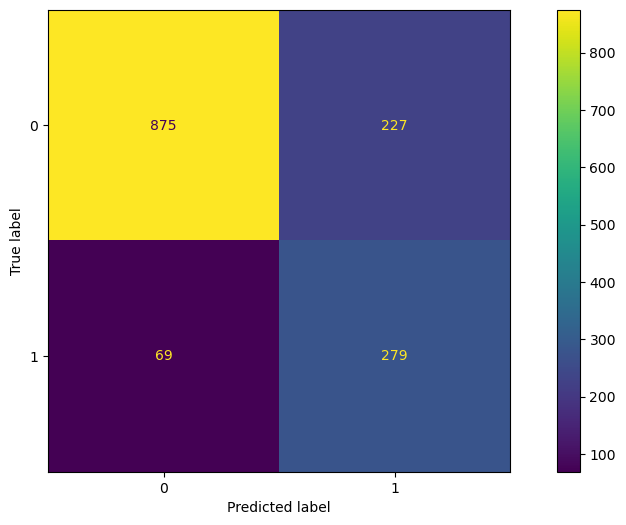

In [64]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion2).plot()
#sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
#plot.xlabel("Predict values")
#plot.ylabel("Real values")
#plot.title("Confusion Matrix (VQC)")
#plot.show()

In [55]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.78
Quantum VQC on the test dataset:     0.80


In [56]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.926907  0.794011  0.855327      1102
           1   0.551383  0.801724  0.653396       348

    accuracy                       0.795862      1450
   macro avg   0.739145  0.797868  0.754362      1450
weighted avg   0.836781  0.795862  0.806864      1450



Utilizando Pegasus

In [57]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [58]:
import numpy as np
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [59]:
# number of qubits is equal to the number of features
num_qubits = len(features.columns)

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

In [60]:
#from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [61]:
from qiskit_machine_learning.algorithms import PegasosQSVC
import time
np.random.seed(123)
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
start = time.time()
pegasos_qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# testing
pegasos_score = pegasos_qsvc.score(X_test_np, y_test_np)
print(f"PegasosQSVC classification test score: {pegasos_score}")

Training time: 1 seconds
PegasosQSVC classification test score: 0.5682758620689655


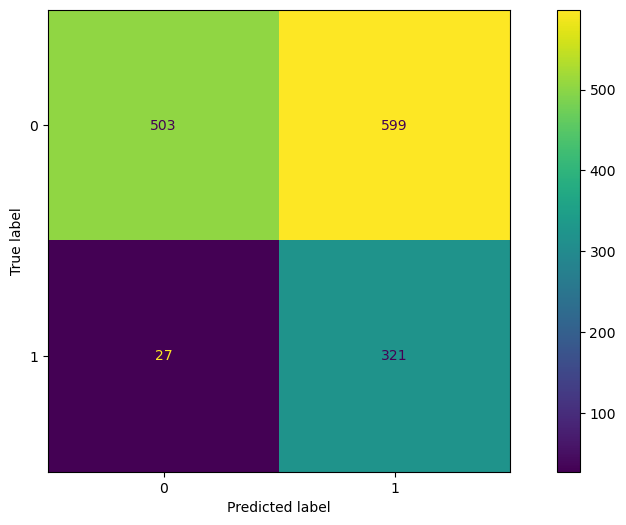

In [75]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
q_predictions = pegasos_qsvc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion2).plot()
#sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
#plot.xlabel("Predict values")
#plot.ylabel("Real values")
#plot.title("Confusion Matrix (PegasusQSVC)")
#plot.show()

In [76]:
train_score_q4 = pegasos_qsvc.score(X_train_np, y_train_np)
test_score_q4 = pegasos_qsvc.score(X_test_np, y_test_np)

print(f"Quantum PQSVC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum PQSVC on the test dataset:     {test_score_q4:.2f}")

Quantum PQSVC on the training dataset: 0.69
Quantum PQSVC on the test dataset:     0.57


In [77]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.949057  0.456443  0.616422      1102
           1   0.348913  0.922414  0.506309       348

    accuracy                       0.568276      1450
   macro avg   0.648985  0.689428  0.561365      1450
weighted avg   0.805022  0.568276  0.589995      1450

